The following notebook contains the code for training lstm based model for gaze data
<br><br>
0: Lie (161 instances) <br>
1: Truth (162 instances) <br>
Seq len: 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SEQ_LEN = 20
SEED_VAL = 0

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import tensorflow as tf
import keras

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import *
from keras.callbacks import EarlyStopping

# Loading datasets

In [ ]:
FEATURES_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Gaze/gaze_features({}).npz".format(SEQ_LEN)
LABELS_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Gaze/gaze_labels({}).npz".format(SEQ_LEN)

In [ ]:
lstm_features = np.load(FEATURES_PATH)["arr_0"]
lstm_labels = np.load(LABELS_PATH)["arr_0"]

In [ ]:
print("Features: {}\nLabels: {}".format(lstm_features.shape, lstm_labels.shape))

Features: (325, 20, 23)
Labels: (325,)


In [ ]:
lstm_features[np.isnan(lstm_features)] = 0

## Train test split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(lstm_features, lstm_labels, test_size=0.25,
                                                                            random_state=SEED_VAL)

In [ ]:
print("Shapes\nTrain:\nFeatures: {}, labels: {}\n\nTest:\nFeatures:{}, labels: {}".format(
    features_train.shape, labels_train.shape, features_test.shape, labels_test.shape
))

Shapes
Train:
Features: (243, 20, 23), labels: (243,)

Test:
Features:(82, 20, 23), labels: (82,)


# Model

## Callbacks

In [ ]:
GAZE_SAVED_MODEL_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/saved-models/Gaze/gaze-lstm({})".format(SEQ_LEN)

gaze_cbk1 = tf.keras.callbacks.ModelCheckpoint(filepath=GAZE_SAVED_MODEL_PATH,
                                               save_weights_only=False,
                                               monitor="val_loss",
                                               mode="min",
                                               verbose=1,
                                               save_best_only=True)


gaze_cbk2 = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                             patience=25,
                                             verbose=1,
                                             mode="min")

## Building model

In [ ]:
def create_lstm_model() :
    model = Sequential()
    model.add(LSTM(16, return_sequences=True, input_shape=(SEQ_LEN, lstm_features.shape[2])))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(8, return_sequences=False))
    model.add(Dense(1, activation="sigmoid"))


    opt = Adam(learning_rate=0.001)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [ ]:
lstm_model = create_lstm_model()

In [ ]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20, 16)            2560      
                                                                 
 lstm_8 (LSTM)               (None, 20, 32)            6272      
                                                                 
 lstm_9 (LSTM)               (None, 20, 64)            24832     
                                                                 
 lstm_10 (LSTM)              (None, 8)                 2336      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 36,009
Trainable params: 36,009
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
lstm_history = lstm_model.fit(features_train, labels_train, epochs=200, validation_split=0.1, shuffle=True, callbacks=[gaze_cbk1, gaze_cbk2])

Epoch 1/200
7/7 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.5046
Epoch 1: val_loss improved from inf to 0.68400, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/Gaze/gaze-lstm(20)


7/7 [==============================] - 29s 3s/step - loss: 0.6966 - accuracy: 0.5046 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 2/200
7/7 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5138
Epoch 2: val_loss did not improve from 0.68400
7/7 [==============================] - 1s 88ms/step - loss: 0.6928 - accuracy: 0.5138 - val_loss: 0.6908 - val_accuracy: 0.6400
Epoch 3/200
7/7 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5183
Epoch 3: val_loss did not improve from 0.68400
7/7 [==============================] - 0s 52ms/step - loss: 0.6924 - accuracy: 0.5183 - val_loss: 0.6927 - val_accuracy: 0.4000
Epoch 4/200
7/7 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5046
Epoch 4: val_loss did not improve from 0.68400
7/7 [==============================] - 0s 58ms/step - loss: 0.6921 - accuracy: 0.5046 - val_loss: 0.6893 - val_accuracy: 0.6400
Epoch 5/200
7/7 [==============================] - ETA: 0s - loss: 0.

7/7 [==============================] - 18s 3s/step - loss: 0.6883 - accuracy: 0.5550 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 9/200
6/7 [========================>.....] - ETA: 0s - loss: 0.6888 - accuracy: 0.5104
Epoch 9: val_loss did not improve from 0.68279
7/7 [==============================] - 0s 52ms/step - loss: 0.6881 - accuracy: 0.5321 - val_loss: 0.6864 - val_accuracy: 0.4400
Epoch 10/200
7/7 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.5459
Epoch 10: val_loss improved from 0.68279 to 0.66614, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/Gaze/gaze-lstm(20)


7/7 [==============================] - 20s 3s/step - loss: 0.6837 - accuracy: 0.5459 - val_loss: 0.6661 - val_accuracy: 0.6400
Epoch 11/200
7/7 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.5505
Epoch 11: val_loss did not improve from 0.66614
7/7 [==============================] - 1s 87ms/step - loss: 0.6824 - accuracy: 0.5505 - val_loss: 0.6766 - val_accuracy: 0.5600
Epoch 12/200
7/7 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.5138
Epoch 12: val_loss did not improve from 0.66614
7/7 [==============================] - 1s 87ms/step - loss: 0.6784 - accuracy: 0.5138 - val_loss: 0.6692 - val_accuracy: 0.6000
Epoch 13/200
7/7 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.5688
Epoch 13: val_loss did not improve from 0.66614
7/7 [==============================] - 1s 85ms/step - loss: 0.6752 - accuracy: 0.5688 - val_loss: 0.6683 - val_accuracy: 0.6000
Epoch 14/200
6/7 [========================>.....] - ETA: 0s - l

7/7 [==============================] - 21s 4s/step - loss: 0.5469 - accuracy: 0.7248 - val_loss: 0.6569 - val_accuracy: 0.6800
Epoch 32/200
7/7 [==============================] - ETA: 0s - loss: 0.5433 - accuracy: 0.6972
Epoch 32: val_loss did not improve from 0.65695
7/7 [==============================] - 0s 50ms/step - loss: 0.5433 - accuracy: 0.6972 - val_loss: 0.6765 - val_accuracy: 0.6000
Epoch 33/200
7/7 [==============================] - ETA: 0s - loss: 0.5355 - accuracy: 0.7064
Epoch 33: val_loss did not improve from 0.65695
7/7 [==============================] - 0s 49ms/step - loss: 0.5355 - accuracy: 0.7064 - val_loss: 0.6686 - val_accuracy: 0.6000
Epoch 34/200
6/7 [========================>.....] - ETA: 0s - loss: 0.5136 - accuracy: 0.7240
Epoch 34: val_loss improved from 0.65695 to 0.61889, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/Gaze/gaze-lstm(20)


7/7 [==============================] - 19s 3s/step - loss: 0.5367 - accuracy: 0.7202 - val_loss: 0.6189 - val_accuracy: 0.6400
Epoch 35/200
7/7 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.7156
Epoch 35: val_loss did not improve from 0.61889
7/7 [==============================] - 0s 48ms/step - loss: 0.5467 - accuracy: 0.7156 - val_loss: 0.6828 - val_accuracy: 0.5600
Epoch 36/200
6/7 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.6927
Epoch 36: val_loss did not improve from 0.61889
7/7 [==============================] - 0s 54ms/step - loss: 0.5435 - accuracy: 0.6927 - val_loss: 0.7170 - val_accuracy: 0.5600
Epoch 37/200
7/7 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7569
Epoch 37: val_loss did not improve from 0.61889
7/7 [==============================] - 0s 52ms/step - loss: 0.4971 - accuracy: 0.7569 - val_loss: 0.6779 - val_accuracy: 0.6000
Epoch 38/200
7/7 [==============================] - ETA: 0s - l

7/7 [==============================] - 19s 3s/step - loss: 0.3944 - accuracy: 0.8211 - val_loss: 0.5767 - val_accuracy: 0.7200
Epoch 50/200
7/7 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8349
Epoch 50: val_loss did not improve from 0.57668
7/7 [==============================] - 0s 50ms/step - loss: 0.3842 - accuracy: 0.8349 - val_loss: 0.7571 - val_accuracy: 0.6400
Epoch 51/200
6/7 [========================>.....] - ETA: 0s - loss: 0.3177 - accuracy: 0.8490
Epoch 51: val_loss did not improve from 0.57668
7/7 [==============================] - 0s 52ms/step - loss: 0.3296 - accuracy: 0.8394 - val_loss: 0.8847 - val_accuracy: 0.6400
Epoch 52/200
6/7 [========================>.....] - ETA: 0s - loss: 0.3554 - accuracy: 0.8281
Epoch 52: val_loss did not improve from 0.57668
7/7 [==============================] - 0s 50ms/step - loss: 0.3591 - accuracy: 0.8211 - val_loss: 0.8322 - val_accuracy: 0.6800
Epoch 53/200
7/7 [==============================] - ETA: 0s - l

# Evaluations

## Curves

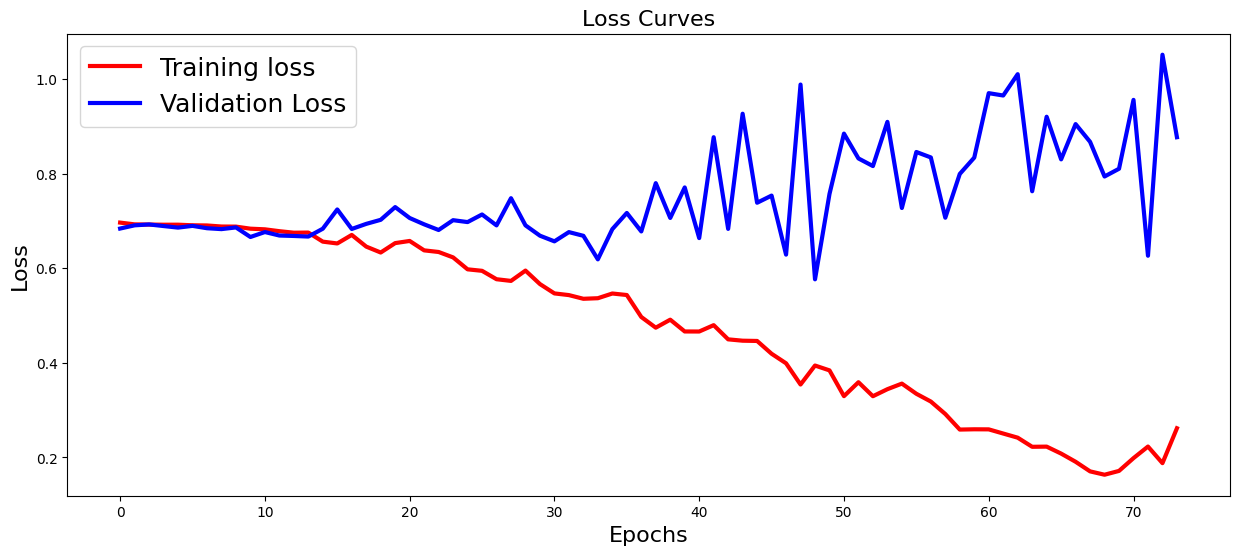

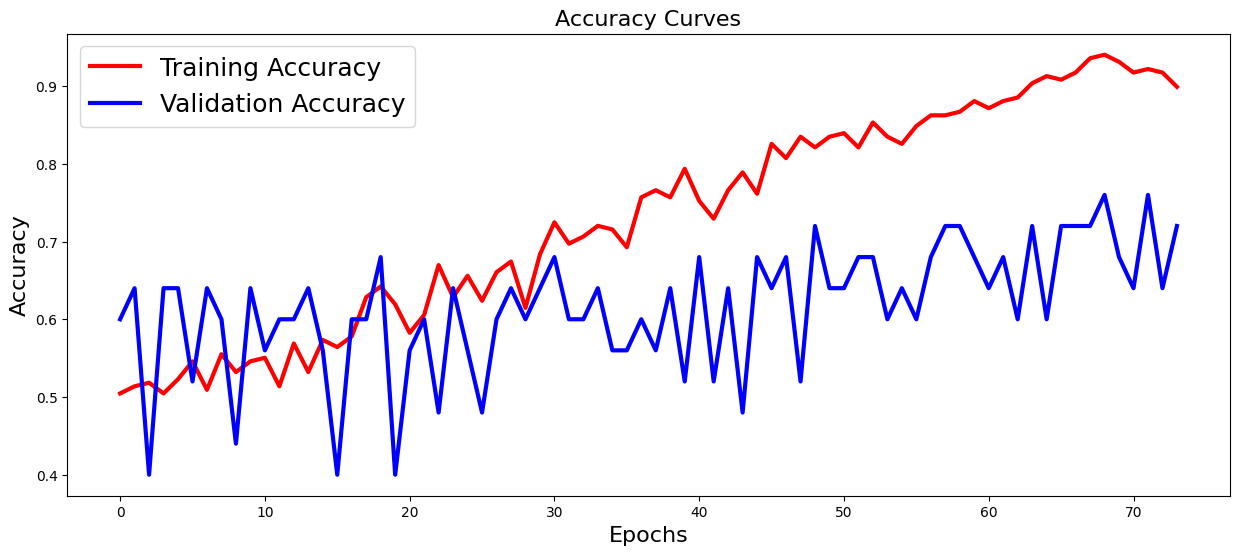

In [ ]:
# plt.figure(figsize=[15, 6])
# plt.plot(lstm_history.history["loss"], "r", linewidth=3.0)
# plt.plot(lstm_history.history["val_loss"], "b", linewidth=3.0)
# plt.legend(["Training loss", "Validation Loss"], fontsize=18)
# plt.xlabel("Epochs", fontsize=16)
# plt.ylabel("Loss", fontsize=16)
# plt.title("Loss Curves", fontsize=16)
# plt.show()

# #Plot the Accuracy Curves
# plt.figure(figsize=[15, 6])
# plt.plot(lstm_history.history["accuracy"], "r", linewidth=3.0)
# plt.plot(lstm_history.history["val_accuracy"], "b", linewidth=3.0)
# plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=18)
# plt.xlabel("Epochs", fontsize=16)
# plt.ylabel("Accuracy", fontsize=16)
# plt.title("Accuracy Curves", fontsize=16)
# plt.show()

## Test set

In [ ]:
model = load_model(GAZE_SAVED_MODEL_PATH)
model.evaluate(features_test, labels_test)

3/3 [==============================] - 2s 18ms/step - loss: 0.8033 - accuracy: 0.6463


[0.8032926321029663, 0.6463414430618286]

### Confusion matrix

3/3 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        44
           1       0.63      0.58      0.60        38

    accuracy                           0.65        82
   macro avg       0.64      0.64      0.64        82
weighted avg       0.65      0.65      0.64        82



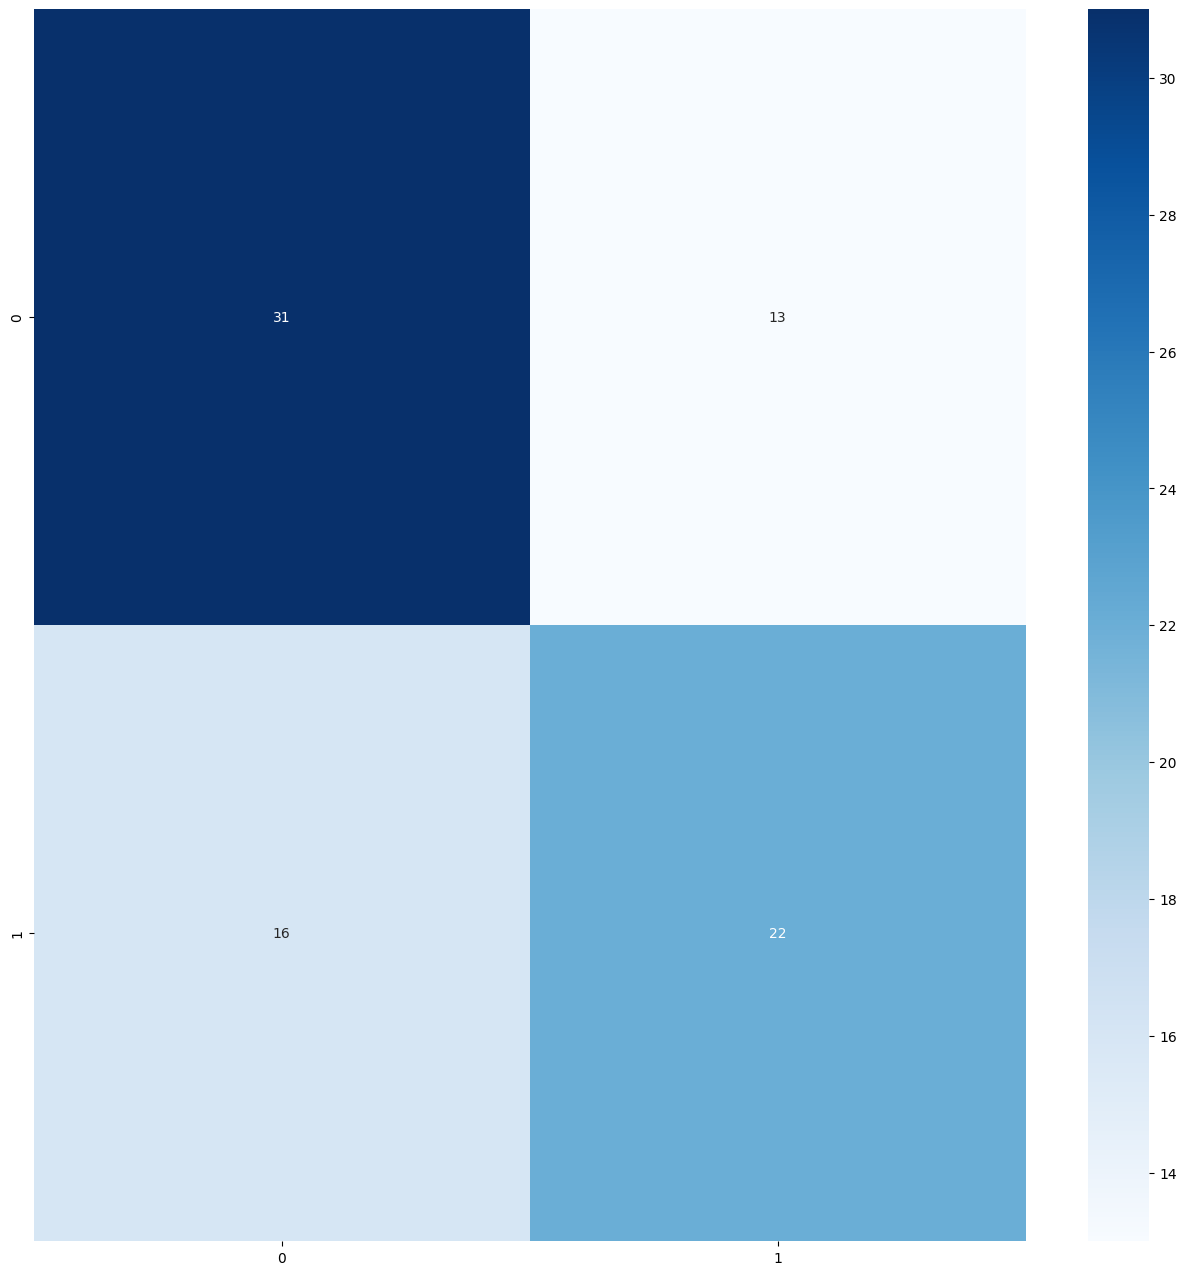

In [ ]:
predicted_classes = np.round(model.predict(features_test))
confusionmatrix = confusion_matrix(labels_test, predicted_classes)
plt.figure(figsize=(16, 16))
sns.heatmap(confusionmatrix, cmap="Blues", annot=True, cbar=True)
print(classification_report(labels_test, predicted_classes))

## Original paper results

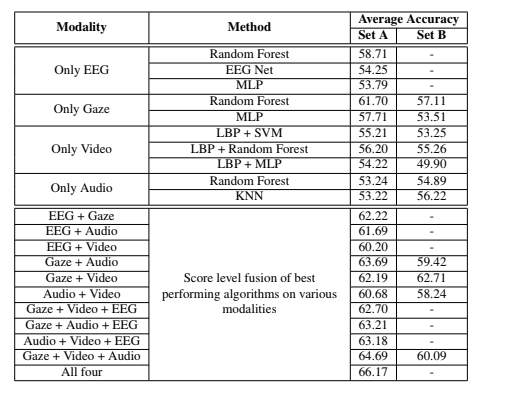

# Extracting features

In [ ]:
model = load_model(GAZE_SAVED_MODEL_PATH)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20, 16)            2560      
                                                                 
 lstm_8 (LSTM)               (None, 20, 32)            6272      
                                                                 
 lstm_9 (LSTM)               (None, 20, 64)            24832     
                                                                 
 lstm_10 (LSTM)              (None, 8)                 2336      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 36,009
Trainable params: 36,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(features_test, labels_test)

3/3 [==============================] - 2s 13ms/step - loss: 0.8033 - accuracy: 0.6463


[0.8032926321029663, 0.6463414430618286]

In [ ]:
model_outputs = model.get_layer("lstm_10").output
child_model = tf.keras.models.Model(inputs=model.inputs, outputs=model_outputs)

In [ ]:
gen_model_output = child_model.predict(lstm_features)

11/11 [==============================] - 4s 11ms/step


In [ ]:
gen_model_output.shape

(325, 8)

In [ ]:
OUTPUT_SAVE_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Gaze/gaze-lstm({})-generated-output".format(SEQ_LEN)
np.savez_compressed(OUTPUT_SAVE_PATH, gen_model_output)